<a href="https://colab.research.google.com/github/james01379/fn_mis/blob/main/Copy_of_Monte_Carlo_and_Structure_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Black-Scholes Pricing Formula（Black-Scholes 定價公式）

Black-Scholes 模型是一種經典的選擇權定價模型，用來評價歐式看漲（call）與看跌（put）選擇權的理論價格. 它假設標的資產價格服從幾何布朗運動（GBM，即價格隨機變動具有對數常態分布).

歐式看漲（Call）選擇權價格公式為：

> $𝐶=𝑆_0⋅𝑁(𝑑_1)−𝐾𝑒^{−𝑟𝑇}⋅𝑁(𝑑_2)$

歐式看跌（Put）選擇權價格公式為：

> $𝑃=𝐾𝑒^{−𝑟𝑇}⋅𝑁(−𝑑_2)−𝑆_0⋅𝑁(−𝑑_1)$

其中，

> $𝑑_1=\frac{ln⁡(\frac{𝑆_0}{𝐾})+(𝑟+\frac{𝜎^2}{2})T}{𝜎\sqrt{𝑇}}$,

> $𝑑_2=𝑑_1−𝜎𝑇$,

> $S_0$：標的資產現價

> $𝐾$：履約價格（strike price）

> $𝑇$：剩餘到期時間（年）

> $𝑟$：無風險利率

> $𝜎$：標的資產報酬率波動度（年化）

> $𝑁(⋅)$：標準常態分布的累積機率函數（CDF）

In [ ]:
import numpy as np
from scipy.stats import norm

# Black-Scholes pricing function
def bs_price(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return price

#以下是全域變數，踫巧與上方的變數設定一樣
# Example
S = 100      # 現價
K = 100      # 履約價
T = 1        # 剩餘到期年
r = 0.05      # 無風險利率
sigma = 0.2   # 波動度

call_price = bs_price(S, K, T, r, sigma, option_type='call')
put_price = bs_price(S, K, T, r, sigma, option_type='put')

print("Call Option Price:", call_price)
print("Put Option Price:", put_price)

Call Option Price: 10.450583572185565
Put Option Price: 5.573526022256971


底下我們繪製在固定標的現價
$𝑆=100$, 到期時間 $𝑇=1$, 無風險利率 $𝑟=5%$, 波動度 $𝜎=20%$ 的條件下, 選擇權價格與履約價格關係:

> 歐式看漲選擇權 (藍線)：隨著履約價格
$𝐾$ 增加，價值遞減.

> 歐式看跌選擇權 (紅線)：隨著履約價格 $𝐾$ 增加，價值遞增.

灰色虛線標示現價 $𝑆=100$，對應於價平選擇權的位置.

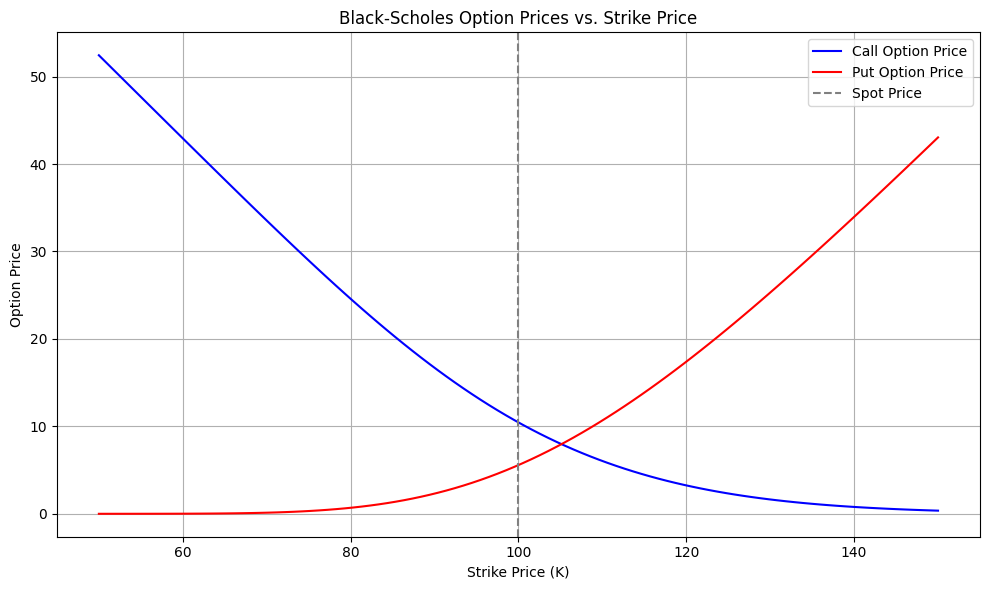

In [ ]:
# Varying strike prices
import matplotlib.pyplot as plt
K_values = np.linspace(50, 150, 100)
call_prices = [bs_price(S, K, T, r, sigma, 'call') for K in K_values]
put_prices = [bs_price(S, K, T, r, sigma, 'put') for K in K_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_values, call_prices, label='Call Option Price', color='blue')
plt.plot(K_values, put_prices, label='Put Option Price', color='red')
plt.axvline(x=S, linestyle='--', color='gray', label='Spot Price')
plt.xlabel('Strike Price (K)')
plt.ylabel('Option Price')
plt.title('Black-Scholes Option Prices vs. Strike Price')
plt.legend() #圖例顯示
plt.grid(True) #網格佈局
plt.tight_layout()
plt.show()

# Part 2: Black-Scholes Greeks（選擇權敏感度指標）

Greeks 是衡量選擇權對市場變數變化敏感度的重要工具，例如對價格, 波動度, 利率, 時間等變動的反應，幫助交易者管理風險與設計對沖策略.


以下為歐式看漲（Call）選擇權的主要 Greeks：

$Delta$（$Δ$）：價格敏感度

> $Δ=𝑁(𝑑_1)$

$Gamma$（$Γ$）：$Delta$ 的變動率

> $Γ=\frac{𝑁′(𝑑_1)}{𝑆𝜎\sqrt{𝑇}}$

$Vega$（$ν$）：對波動度變化的敏感度

> $Vega=𝑆𝑁′(𝑑_1)\sqrt{𝑇}$

$Theta$（$Θ$）：對時間流逝的敏感度

> $\Theta=-\frac{SN'(d_1)\sigma}{2\sqrt{T}}-rKe^{-rT}N(d_2)$

$Rho$（$ρ$）：對利率變化的敏感度

> $\rho=KTe^{-rT}N(d_2)$

其中：

> $𝑁(⋅)$：標準常態分布的 CDF

> $𝑁′(⋅)$：標準常態分布的 PDF

> $𝑑_1$ 與 $𝑑_2$ 同 Part 1 定義

Put Option 的 Greeks 也可推導出類似的對應公式。

In [ ]:
def bs_greeks(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    delta = norm.cdf(d1) if option_type == 'call' else norm.cdf(d1) - 1
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) -
             r * K * np.exp(-r * T) * norm.cdf(d2)) if option_type == 'call' else \
            (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) +
             r * K * np.exp(-r * T) * norm.cdf(-d2))
    rho = K * T * np.exp(-r * T) * norm.cdf(d2) if option_type == 'call' else \
          -K * T * np.exp(-r * T) * norm.cdf(-d2)

    return {'Delta': delta, 'Gamma': gamma, 'Vega': vega, 'Theta': theta, 'Rho': rho}

Black-Scholes 五大敏感度（Greeks）在不同履約價格 $𝐾$ 下的變化情況:

$Delta$：靠近價平區間($𝐾≈𝑆$)變化最劇烈.

$Gamma$：在價平時達到峰值，代表 $Delta$ 變化最敏感.

$Vega$：在價平時也最大，表示波動度對價值影響最大.

$Theta$：靠近價平時最負，時間流逝對價值的侵蝕最大.

$Rho$：越價內越敏感，顯示利率對深價內選擇權影響較大.

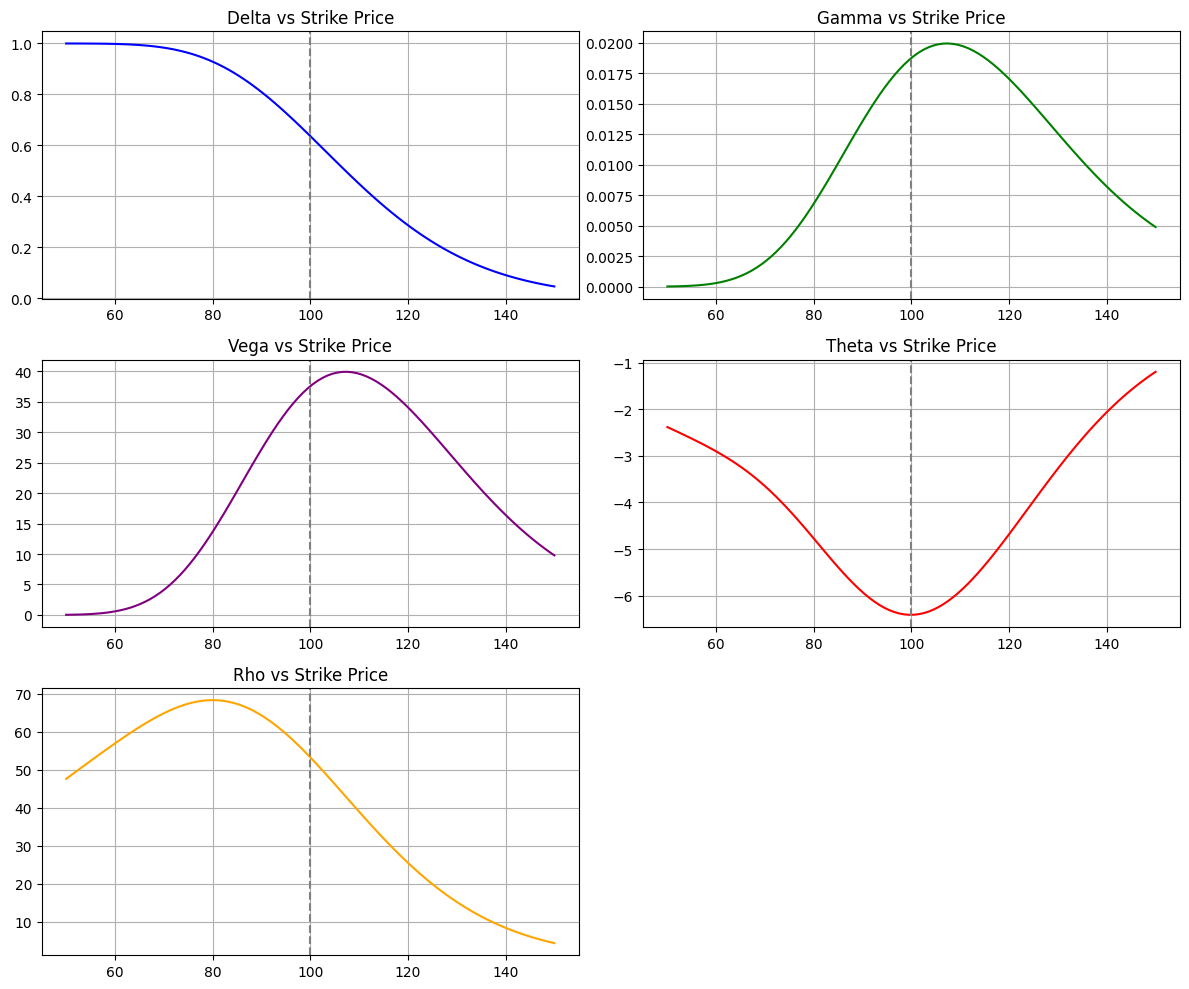

In [ ]:
# Parameters
S = 100
T = 1
r = 0.05
sigma = 0.2
K_values = np.linspace(50, 150, 100)

# Arrays to store Greeks
delta_vals = []
gamma_vals = []
vega_vals = []
theta_vals = []
rho_vals = []

for K in K_values:
    greeks = bs_greeks(S, K, T, r, sigma, option_type='call')
    delta_vals.append(greeks['Delta'])
    gamma_vals.append(greeks['Gamma'])
    vega_vals.append(greeks['Vega'])
    theta_vals.append(greeks['Theta'])
    rho_vals.append(greeks['Rho'])

# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(K_values, delta_vals, label='Delta', color='blue')
plt.axvline(S, linestyle='--', color='gray')
plt.title('Delta vs Strike Price')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(K_values, gamma_vals, label='Gamma', color='green')
plt.axvline(S, linestyle='--', color='gray')
plt.title('Gamma vs Strike Price')
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(K_values, vega_vals, label='Vega', color='purple')
plt.axvline(S, linestyle='--', color='gray')
plt.title('Vega vs Strike Price')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(K_values, theta_vals, label='Theta', color='red')
plt.axvline(S, linestyle='--', color='gray')
plt.title('Theta vs Strike Price')
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(K_values, rho_vals, label='Rho', color='orange')
plt.axvline(S, linestyle='--', color='gray')
plt.title('Rho vs Strike Price')
plt.grid(True)

plt.tight_layout()
plt.show()

# Part 3: Monte Carlo 模擬法計算歐式選擇權價格

當遇到複雜的標的資產結構（例如多資產, 障礙條件, 提早贖回等）時，Black-Scholes 的封閉解無法處理，因此需要透過數值模擬，如 Monte Carlo 模擬法.

根據風險中立評價原則，選擇權的理論價格為：

$𝐶=𝑒^{−𝑟𝑇}⋅𝐸[max⁡(𝑆_𝑇−𝐾,0)]$

其中 $𝑆_𝑇$ 是模擬出的到期時標的價格，由幾何布朗運動給出：

$𝑆_𝑇=𝑆_0⋅𝑒^{(𝑟−\frac{1}{2}𝜎^2)𝑇+𝜎\sqrt{𝑇}𝑍}$, $𝑍∼𝑁(0,1)$

ds/s = ds * dt * fi * sigma dw

In [ ]:
import numpy as np

def monte_carlo_option_price(S, K, T, r, sigma, simulations=100000, option_type='call'):
    np.random.seed(42)  # for reproducibility
    Z = np.random.standard_normal(simulations)
    ST = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    if option_type == 'call':
        payoff = np.maximum(ST - K, 0)
    else:
        payoff = np.maximum(K - ST, 0)

    price = np.exp(-r * T) * np.mean(payoff)
    return price

# Parameters
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.2

mc_call_price = monte_carlo_option_price(S, K, T, r, sigma, option_type='call')
mc_put_price = monte_carlo_option_price(S, K, T, r, sigma, option_type='put')

print("Monte Carlo Call Price:", mc_call_price)
print("Monte Carlo Put Price:", mc_put_price)

Monte Carlo Call Price: 10.473891960702577
Monte Carlo Put Price: 5.574185640007579


我們可以透過比較 Black-Scholes 封閉解與 Monte Carlo 模擬結果來檢驗精度：

In [ ]:
bs_call = bs_price(S, K, T, r, sigma, 'call')
print(f"BS Call: {bs_call:.4f}, MC Call: {mc_call_price:.4f}")

BS Call: 10.4506, MC Call: 10.4739


## Monte Carlo 模擬的應用重點
適用於：無封閉解的 exotic options (例如 Barrier, Asian, Lookback, Autocall).

計算量大, 可加速 (Numba / GPU).

結合模擬可導出對應 Greeks (使用 Pathwise Derivatives 或 Likelihood Ratio).

## Monte Carlo 模擬法：估計 Delta 與 Vega

有限差分估計公式

$Delta$:
$Δ≈\frac{𝐶(𝑆+𝜖)−𝐶(𝑆−𝜖)}{2𝜖}$

$Vega$: $Vega≈\frac{𝐶(𝜎+𝜖)−𝐶(𝜎−𝜖)}{2𝜖}$

這裡 𝐶(⋅) 表示 Monte Carlo 模擬所得的期權價格.

In [ ]:
def monte_carlo_delta_vega(S, K, T, r, sigma, epsilon=1e-2, simulations=100000):
    # Delta approximation
    price_up = monte_carlo_option_price(S + epsilon, K, T, r, sigma, simulations, 'call')
    price_down = monte_carlo_option_price(S - epsilon, K, T, r, sigma, simulations, 'call')
    delta = (price_up - price_down) / (2 * epsilon)

    # Vega approximation
    price_vol_up = monte_carlo_option_price(S, K, T, r, sigma + epsilon, simulations, 'call')
    price_vol_down = monte_carlo_option_price(S, K, T, r, sigma - epsilon, simulations, 'call')
    vega = (price_vol_up - price_vol_down) / (2 * epsilon)

    return delta, vega

delta_mc, vega_mc = monte_carlo_delta_vega(S, K, T, r, sigma)
print(f"Monte Carlo Delta ≈ {delta_mc:.4f}")
print(f"Monte Carlo Vega ≈ {vega_mc:.4f}")


Monte Carlo Delta ≈ 0.6375
Monte Carlo Vega ≈ 37.6339


與前面 Black-Scholes Greeks 做比較：

In [ ]:
greeks_bs = bs_greeks(S, K, T, r, sigma, 'call')
print(f"BS Delta: {greeks_bs['Delta']:.4f}, MC Delta: {delta_mc:.4f}")
print(f"BS Vega: {greeks_bs['Vega']:.4f}, MC Vega: {vega_mc:.4f}")

BS Delta: 0.6368, MC Delta: 0.6375
BS Vega: 37.5240, MC Vega: 37.6339


# Part 4: 結構型債券（Structured Notes with Monte Carlo）

許多結構型商品包含： Barrier 條件（knock-in, knock-out）, Autocall 條件（達標即提前贖回）, 複利 Coupon 結構, 這些都無法用 Black-Scholes 封閉解處理，需仰賴模擬.

Autocallable Note 商品條件如下：

|條件	|說明|
|---|---|
|初始價格|$𝑆_0=100$|
|Barrier|	$110$，若觀察日價格超過即提前贖回|
|Coupon|$8\%$，每季觀察一次|
|到期時間|	$𝑇=2$ 年|
|無風險利率	|$ 𝑟=3\% $|
|波動度|	$𝜎=20\%$|

每一次觀察時，如果 $𝑆_{𝑡_𝑖}≥$ Barrier，即提前贖回並支付 Coupon：

$Payoff=(1+𝑐)⋅𝑒^{−𝑟_{𝑡_𝑖}}$


若從未觸發贖回，則到期還本 ⇒ $Payoff=1⋅𝑒^{−𝑟𝑇}$


In [ ]:
def simulate_autocall(S0, barrier, coupon, r, sigma, T, obs_freq='quarterly', simulations=10000): #stimulation表示跑得次數
    dt_map = {'monthly': 1/12, 'quarterly': 0.25, 'yearly': 1}
              #  次數：12 ;         4次       ;             1次
    dt = dt_map[obs_freq]
    steps = int(T / dt)
    discount = np.exp(-r * dt)

    np.random.seed(0)
    payoffs = []

    for sim in range(simulations):
        S = S0
        for i in range(steps):
            Z = np.random.normal()
            S *= np.exp((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z)
            if S >= barrier:
                # Early redemption with coupon
                payoff = (1 + coupon) * np.exp(-r * dt * (i + 1))
                break # 提前贖回
        else:
          payoff = 1 * np.exp(-r * T)  # No redemption, return principal

        payoffs.append(payoff)

    return np.mean(payoffs)


In [ ]:
autocall_price = simulate_autocall(
    S0=100, barrier=110, coupon=0.08,
    r=0.03, sigma=0.2, T=2,
    obs_freq='quarterly', simulations=10000
)
print(f"Autocallable Note Price: {autocall_price:.4f}")

Autocallable Note Price: 1.0108


# Exercise：Knock-In Knock-Out (KIKO) Barrier Note 定價模擬
商品結構

|條件|	說明|
|--|--|
|名目本金	|$100$ 元 (最後乘上贖回倍數)|
|初始價格 $𝑆_0$|$100$|
|Knock-In Barrier	|$80$ (價格曾經跌破則到期時依照期末價格兌付)|
|Knock-Out Barrier	|$120$ (價格曾經觸及則立即提前贖回並支付 5% Coupon)|
|到期時間 𝑇|$1$ 年|
|無風險利率 𝑟|$2\%$|
|波動度 𝜎|$25\%$|
|模擬次數	|$50,000$|

評價邏輯
若標的資產價格曾經高於 Knock-Out Barrier → 立即贖回本利和：

$Payoff=105⋅𝑒^{−𝑟𝑡_{KO}}$

否則若價格曾經低於 Knock-In Barrier，但從未觸發 Knock-Out → 以期末價格兌付(模擬為本利和折現)：

$Payoff=\frac{𝑆𝑇}{𝑆0}⋅100⋅𝑒^{−𝑟𝑇}$

若從未觸發 KO 或 KI → 按面額 100 贖回：

$Payoff=100⋅𝑒^{−𝑟𝑇}$
